### 集成学习方法

#### 使用 hard Voting Classifier

In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

### 接口参数
>class sklearn.ensemble.BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=1, random_state=None, verbose=0)[source]

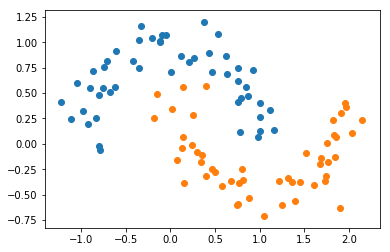

In [18]:
X,y=make_moons(noise=0.15,random_state=111)
X_train,X_test,y_train,y_test=train_test_split(X,y)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [19]:
voting_clf=VotingClassifier(estimators=[
    ('decison_tree',DecisionTreeClassifier(random_state=888)),
    ('svm',SVC()),
    ('logistic',LogisticRegression())],
    voting='hard')

In [20]:
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.88

#### 使用soft Voting Classifier

In [21]:
voting_clf=VotingClassifier(estimators=[
    ('decison_tree',DecisionTreeClassifier(random_state=888)),
    ('svm',SVC(probability=True)),
    ('logistic',LogisticRegression())],
    voting='soft')

In [22]:
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.92000000000000004

#### bagging VS pasting (放回采样和不放回采样)

sklearn使用bootstrap参数控制采样时是否放回。

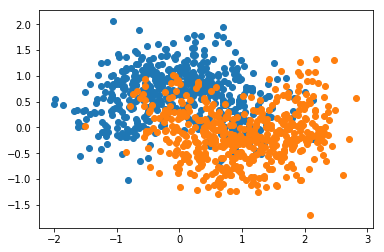

In [27]:
X,y=make_moons(n_samples=1000,noise=0.4,random_state=111)
X_train,X_test,y_train,y_test=train_test_split(X,y)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [28]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=500, max_samples=100,
                           bootstrap=True)
bagging_clf.fit(X_train, y_train)
print bagging_clf.score(X_test, y_test)

0.856


In [29]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=10, max_samples=50,
                           bootstrap=False)
bagging_clf.fit(X_train, y_train)
print bagging_clf.score(X_test, y_test)

0.86


In [32]:
%%time
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=5000, max_samples=300,
                           bootstrap=True)
bagging_clf.fit(X_train, y_train)
print bagging_clf.score(X_test, y_test)

0.884
Wall time: 14 s


## OOB

#### 关于OOB（out-of-bag）：在放回抽样中，大概有37%的数据在采样的过程中不会被采集到，所以使用有放回抽样的集成学习中，可以使用未被采集到的样本评价模型的精度。sklearn直接提供了方法可供调用

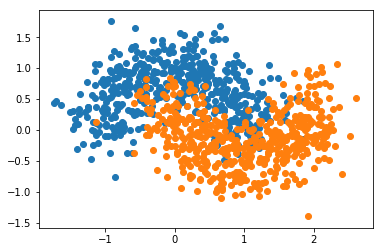

In [31]:
X,y=make_moons(n_samples=1000,noise=0.3,random_state=111)
X_train,X_test,y_train,y_test=train_test_split(X,y)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [36]:
%%time
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=5000, max_samples=300,
                           bootstrap=True,oob_score=True)
bagging_clf.fit(X, y)
print bagging_clf.oob_score_

0.899
Wall time: 15.3 s


#### n_jobs参数控制并行化计算

In [39]:
%%time
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=5000, max_samples=300,
                           bootstrap=True,oob_score=True,
                            n_jobs=-1)
bagging_clf.fit(X, y)
print bagging_clf.oob_score_

0.897
Wall time: 10.1 s


### 除了在样本上进行随机采样外还可以对特征进行采样：bootstrap_features

In [50]:
%%time
random_subspaces_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=1000,   #相当于不在样本上进行采样。只在特征上进行采样
                               bootstrap=True, oob_score=True,
                               max_features=1, bootstrap_features=True)
random_subspaces_clf.fit(X, y)
print random_subspaces_clf.oob_score_

0.802
Wall time: 1.74 s


In [51]:
%%time
random_patches_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=500,
                               bootstrap=True, oob_score=True,
                               max_features=1, bootstrap_features=True)
random_patches_clf.fit(X, y)
print random_patches_clf.oob_score_

0.825
Wall time: 1.7 s


### sklearn封装的决策树提供了更强的随机性:
- 在每个节点进行划分时，在随机的特征子集上进行最优特征和最优阈值的搜索和划分
- 随机森林的底层决策算法依然是决策树，只是封装了bagging,所以有baggging和decisionTree的所有参数

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=666, n_jobs=-1)
rf_clf.fit(X, y)
rf_clf.oob_score_


0.89300000000000002

In [55]:
rf_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, oob_score=True, random_state=666, n_jobs=-1)
rf_clf2.fit(X, y)
rf_clf2.oob_score_

0.89600000000000002

###  Extra-Trees
- 在决策树的结点划分时使用随机的特征和随机的阈值

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
et_clf = ExtraTreesClassifier(n_estimators=50000, bootstrap=True, oob_score=True, random_state=666, n_jobs=-1)
et_clf.fit(X, y)
et_clf.oob_score_

0.88700000000000001

# boosting集成学习

### AdaBoosting

In [58]:
from sklearn.ensemble import AdaBoostClassifier

In [60]:
ada_cls=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),n_estimators=1000)
ada_cls.fit(X_train,y_train)
print ada_cls.score(X_test,y_test)

0.872


### GradientBoosting
- GradientBoosting以决策树作为基础的估计器。

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gra_cls=GradientBoostingClassifier(max_depth=3,n_estimators=800)
gra_cls.fit(X_train,y_train)
print gra_cls.score(X_test,y_test)

0.88
